### Homework 7: Twitter Analysis
#### Three Observed Trends:
* Based on its last 100 tweets, CBS is by far the most negative news group.  This isn't surprising though because I know CBS likes to cover all the big disasters in minute detail.
* Looking at the past 100 tweets graphed by their polarity, it looks like news groups regularly tweet positive, negative and neutral statements all mixed together.  Which makes sense because they want to keep people informed without alienating them.
* In line with that last trend, the mean of the compound scores reveals that aside from CBS, the other four news groups all have pretty neutral sentiments: none are more than 0.06 away from 0 (neutral).

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
import tweepy
import time
import seaborn as sns

In [2]:
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Your Twitter API Keys
consumer_key = "upirodCY2co1RE0sZEXHHn5zD"
consumer_secret = "79itXeCrB62Vn5Mlo9Wxy8W8XTdZ5j6Z9xYd0wdz4gH92v7603"
access_token = "145313405-FU8Qm3irda0pxkl2mRsKtlgqezMCoXKBEpYmdo8V"
access_token_secret = "P48ptma6qloSWTVRbbSTVHXcKste7PHfijx7lRprOHHVA"

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

### Making the Data Frame:

In [4]:
target_user_one="@FoxNews"

# Variables for holding sentiments
fox_sentiments = []
fox_compound_sentiments=[]
counter = 1
page_counter=1
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    user_account = api.get_user(target_user_one)
    user_real_name = user_account["name"]

    # Get the specific column data
    user_tweets = user_account["statuses_count"]

    #user_tweets = user_account["tweets"]
    #print(user_tweets)
    public_tweets = api.user_timeline(target_user_one, page=page_counter)
    page_counter=page_counter+1

    # Loop through all tweets 
    for tweet in public_tweets:

        # print(tweet["text"])
        # print("Tweet %s: %s" % (counter, tweet["text"]))

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        fox_compound_sentiments.append(compound)  

        # Add sentiments for each tweet into an array
        fox_sentiments.append({"FOX NEWS.........Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        # Add to counter 
        counter = counter + 1

In [5]:
fox_sentiments_pd = pd.DataFrame.from_dict(fox_sentiments)
fox_sentiments_pd

,Compound,FOX NEWS.........Date,Negative,Neutral,Positive,Tweets Ago
0,0.6908,Mon Mar 05 20:13:17 +0000 2018,0.725,0.000,0.275,1
1,0.0000,Mon Mar 05 20:13:05 +0000 2018,1.000,0.000,0.000,2
2,0.4019,Mon Mar 05 20:04:17 +0000 2018,0.838,0.000,0.162,3
3,-0.0258,Mon Mar 05 19:43:24 +0000 2018,0.807,0.099,0.094,4
4,-0.4166,Mon Mar 05 19:28:25 +0000 2018,0.497,0.265,0.238,5
5,-0.5106,Mon Mar 05 19:14:26 +0000 2018,0.784,0.216,0.000,6
6,-0.1901,Mon Mar 05 18:55:00 +0000 2018,0.853,0.147,0.000,7
7,0.0772,Mon Mar 05 18:40:46 +0000 2018,0.939,0.000,0.061,8
8,0.6705,Mon Mar 05 18:38:58 +0000 2018,0.766,0.000,0.234,9
9,0.0000,Mon Mar 05 18:28:48 +0000 2018,1.000,0.000,0.000,10


In [6]:
target_user_two="@NYTimes"
# Counter
counter = 1

# Variables for holding sentiments
nyt_sentiments = []
nyt_compound_sentiments=[]
counter = 1
page_counter=1
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    user_account = api.get_user(target_user_two)
    public_tweets = api.user_timeline(target_user_two, page=page_counter)
    page_counter=page_counter+1

    # Loop through all tweets 
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        nyt_compound_sentiments.append(compound)  

        # Add sentiments for each tweet into an array
        nyt_sentiments.append({"NEW YORK TIMES .... Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        # Add to counter 
        counter = counter +1

In [7]:
nyt_sentiments_pd = pd.DataFrame.from_dict(nyt_sentiments)
nyt_sentiments_pd

,Compound,NEW YORK TIMES .... Date,Negative,Neutral,Positive,Tweets Ago
0,0.3612,Mon Mar 05 20:00:40 +0000 2018,0.615,0.000,0.385,1
1,0.0516,Mon Mar 05 19:52:04 +0000 2018,0.732,0.110,0.159,2
2,0.6808,Mon Mar 05 19:45:04 +0000 2018,0.772,0.000,0.228,3
3,0.0258,Mon Mar 05 19:39:39 +0000 2018,0.952,0.000,0.048,4
4,-0.1779,Mon Mar 05 19:37:04 +0000 2018,0.928,0.072,0.000,5
5,0.5574,Mon Mar 05 19:30:19 +0000 2018,0.833,0.000,0.167,6
6,0.4926,Mon Mar 05 19:22:08 +0000 2018,0.775,0.000,0.225,7
7,0.0000,Mon Mar 05 19:15:05 +0000 2018,1.000,0.000,0.000,8
8,-0.5423,Mon Mar 05 19:07:06 +0000 2018,0.632,0.246,0.123,9
9,0.0000,Mon Mar 05 19:00:30 +0000 2018,1.000,0.000,0.000,10


In [8]:
target_user_three="@cnn"
# Counter
counter = 1

# Variables for holding sentiments
cnn_sentiments = []
cnn_compound_sentiments=[]
counter = 1
page_counter=1
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user_three, page=page_counter)
    page_counter=page_counter+1

    # Loop through all tweets 
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        cnn_compound_sentiments.append(compound)  

        # Add sentiments for each tweet into an array
        cnn_sentiments.append({"CNN ....... Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        # Add to counter 
        counter = counter + 1

In [9]:
cnn_sentiments_pd = pd.DataFrame.from_dict(cnn_sentiments)
cnn_sentiments_pd

,CNN ....... Date,Compound,Negative,Neutral,Positive,Tweets Ago
0,Mon Mar 05 20:08:09 +0000 2018,0.0000,1.000,0.000,0.000,1
1,Mon Mar 05 20:03:42 +0000 2018,0.7096,0.753,0.000,0.247,2
2,Mon Mar 05 19:57:45 +0000 2018,0.4404,0.804,0.000,0.196,3
3,Mon Mar 05 19:46:13 +0000 2018,0.1779,0.863,0.000,0.137,4
4,Mon Mar 05 19:26:27 +0000 2018,-0.4939,0.802,0.198,0.000,5
5,Mon Mar 05 19:21:52 +0000 2018,-0.6597,0.647,0.272,0.082,6
6,Mon Mar 05 19:10:03 +0000 2018,-0.1280,0.927,0.073,0.000,7
7,Mon Mar 05 19:00:47 +0000 2018,0.4389,0.806,0.000,0.194,8
8,Mon Mar 05 18:51:46 +0000 2018,-0.7184,0.714,0.237,0.049,9
9,Mon Mar 05 18:16:52 +0000 2018,0.0000,1.000,0.000,0.000,10


In [10]:
target_user_four="@CBSNews"

# Variables for holding sentiments
cbs_sentiments = []
cbs_compound_sentiments=[]
counter = 1
page_counter=1
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):   
    public_tweets = api.user_timeline(target_user_four, page=page_counter)
    page_counter=page_counter+1

    # Loop through all tweets 
    for tweet in public_tweets:
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        cbs_compound_sentiments.append(compound)  

        # Add sentiments for each tweet into an array
        cbs_sentiments.append({"CBS NEWS . . . Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        # Add to counter 
        counter = counter + 1

In [11]:
cbs_sentiments_pd = pd.DataFrame.from_dict(cbs_sentiments)
cbs_sentiments_pd

,CBS NEWS . . . Date,Compound,Negative,Neutral,Positive,Tweets Ago
0,Mon Mar 05 20:12:02 +0000 2018,0.3716,0.876,0.000,0.124,1
1,Mon Mar 05 20:10:26 +0000 2018,0.0000,1.000,0.000,0.000,2
2,Mon Mar 05 20:05:58 +0000 2018,0.0000,1.000,0.000,0.000,3
3,Mon Mar 05 20:01:32 +0000 2018,-0.2023,0.924,0.076,0.000,4
4,Mon Mar 05 19:49:23 +0000 2018,-0.5106,0.852,0.148,0.000,5
5,Mon Mar 05 19:45:00 +0000 2018,-0.5346,0.794,0.206,0.000,6
6,Mon Mar 05 19:42:08 +0000 2018,-0.7351,0.735,0.265,0.000,7
7,Mon Mar 05 19:39:24 +0000 2018,-0.5574,0.870,0.130,0.000,8
8,Mon Mar 05 19:37:43 +0000 2018,0.4215,0.810,0.052,0.138,9
9,Mon Mar 05 19:36:30 +0000 2018,0.6369,0.785,0.000,0.215,10


In [12]:
target_user_five="@BBC"

# Variables for holding sentiments
bbc_sentiments = []
bbc_compound_sentiments=[]
counter = 1
page_counter=1
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):   
    public_tweets = api.user_timeline(target_user_five, page=page_counter)
    page_counter=page_counter+1

    # Loop through all tweets 
    for tweet in public_tweets:
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        bbc_compound_sentiments.append(compound)  

        # Add sentiments for each tweet into an array
        bbc_sentiments.append({"BBC . . . . . Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        # Add to counter 
        counter = counter + 1

In [13]:
bbc_sentiments_pd = pd.DataFrame.from_dict(bbc_sentiments)
bbc_sentiments_pd.to_csv("bbc_sentiments.csv")
bbc_sentiments_pd

,BBC . . . . . Date,Compound,Negative,Neutral,Positive,Tweets Ago
0,Mon Mar 05 19:30:07 +0000 2018,0.0000,1.000,0.000,0.000,1
1,Mon Mar 05 18:38:04 +0000 2018,-0.8555,0.592,0.408,0.000,2
2,Mon Mar 05 17:23:22 +0000 2018,0.6124,0.737,0.000,0.263,3
3,Mon Mar 05 17:15:34 +0000 2018,0.4472,0.789,0.000,0.211,4
4,Mon Mar 05 17:00:31 +0000 2018,0.1531,0.818,0.077,0.105,5
5,Mon Mar 05 14:48:43 +0000 2018,0.0000,1.000,0.000,0.000,6
6,Mon Mar 05 14:43:13 +0000 2018,-0.1779,0.855,0.145,0.000,7
7,Mon Mar 05 14:42:36 +0000 2018,0.0000,1.000,0.000,0.000,8
8,Mon Mar 05 14:11:28 +0000 2018,-0.6621,0.760,0.240,0.000,9
9,Mon Mar 05 14:07:00 +0000 2018,0.0000,1.000,0.000,0.000,10


### Scatter Plot:

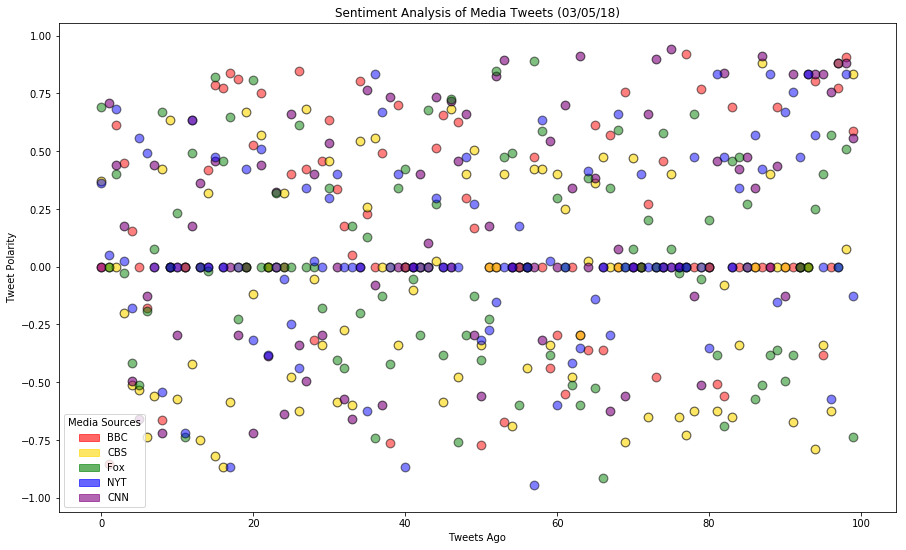

In [25]:
plt.figure(figsize=(15, 9))
patch_1=mpatches.Patch(color="blue", label='NYT', alpha=0.6)
patch_2=mpatches.Patch(color="red", label='BBC', alpha=0.6)
patch_3=mpatches.Patch(color="gold", label='CBS', alpha=0.6)
patch_4=mpatches.Patch(color="purple", label='CNN', alpha=0.6)
patch_5=mpatches.Patch(color="green", label='Fox', alpha=0.6)

plt.scatter(np.arange(len(bbc_sentiments)), bbc_compound_sentiments, alpha=0.5, s=75, color="red", 
            edgecolors="black", linewidth=1.2)
plt.scatter(np.arange(len(cbs_sentiments)), cbs_compound_sentiments, alpha=0.6, s=75, color="gold", 
            edgecolors="black", linewidth=1.2)
plt.scatter(np.arange(len(cnn_sentiments)), cnn_compound_sentiments, alpha=0.6, s=75, color="purple", 
            edgecolors="black", linewidth=1.2)
plt.scatter(np.arange(len(fox_sentiments)), fox_compound_sentiments, alpha=0.5, s=75, color="green", 
            edgecolors="black", linewidth=1.2)
plt.scatter(np.arange(len(nyt_sentiments)), nyt_compound_sentiments, alpha=0.5, s=75, color="blue", 
            edgecolors="black", linewidth=1.2)
# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(handles=[ patch_2, patch_3, patch_5, patch_1, patch_4], title="Media Sources")

plt.show()

### Bar Graph:

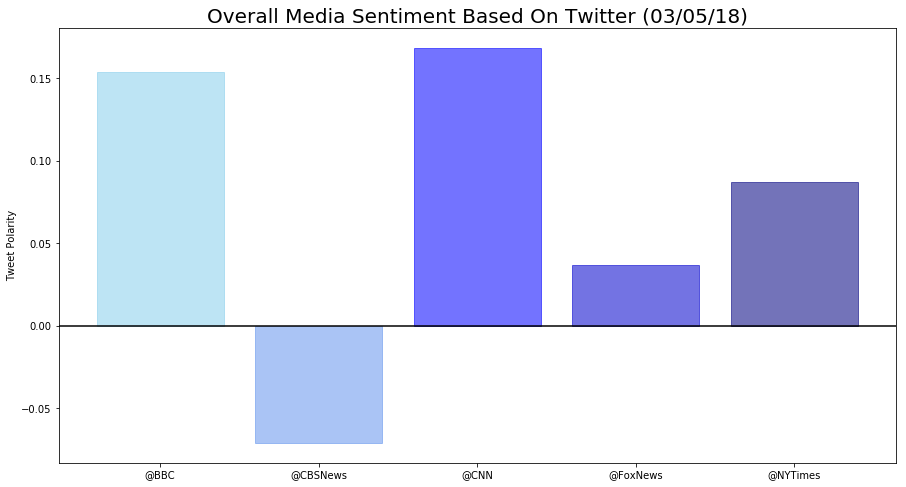

In [15]:
plt.figure(figsize=(15,8))
colors_list=["red", "orange", "gold", "green", "blue"]
news_groups=("@BBC","@CBSNews","@CNN","@FoxNews","@NYTimes")
y_pos = np.arange(len(news_groups))
performance = [np.mean(bbc_compound_sentiments), np.mean(cbs_compound_sentiments),
              np.mean(cnn_compound_sentiments), np.mean(fox_compound_sentiments),
              np.mean(nyt_compound_sentiments)]
barlist=plt.bar(y_pos, performance, align='center', alpha=0.55)
barlist[0].set_color('skyblue')
barlist[1].set_color('cornflowerblue')
barlist[2].set_color('blue')
barlist[3].set_color('mediumblue')
barlist[4].set_color('navy')
plt.xticks(y_pos, news_groups)
plt.ylabel('Tweet Polarity')
plt.title('Overall Media Sentiment Based On Twitter (%s)' % (time.strftime("%x")), fontsize=20)
#plt.savefig('hw_7_plot_two.png')
plt.axhline(0, color='black')

plt.show()